# Spatial Power Variability

## Goal:
Create a function that takes in the degree and order of Gauss coefficients, time series matrix format (show example), calculates l values needed for spatial power variability and possibly plot spatial power variability

### Spatial power variability equation:

$ R_{l}\left( t\right) =\left( l+1\right) \sum ^{l}_{m=0}\left\{ \left[ g_{l}^{m}\left( t\right) \right] ^{2}+\left[ h_{l}^{m}\left( t\right) \right] ^{2}\right\} $

## Tests:
* Ratio of power between l values
* Summation gets larger with increasing l
* Time series all the same length

In [1]:
import numpy as np
import time
import matplotlib as mpl
import matplotlib.pyplot as plt

start_time1 =time.time()
GCtxt = np.loadtxt('ggf100k_matrixFormatTest.txt')
print("--- %s seconds ---" % (time.time() - start_time1))

--- 8.624871969223022 seconds ---


### Create a dictionary or list of Gauss coefficients from degree and order
* Matrix needs to include year as columns
* Coefficients need to be a row with associated year
* Put example of format

In [2]:
# Calculate the number of coefficients per year
degree = 10

totalGC=0
for index in range(1, degree+1):
    totalGC+= 2*index+1
    # print(totalGC)
assert index == degree

In [3]:
# Create dictionary of Gauss coefficients, eventually make a def/ function

GClist=['year']
j=0
for index in range(1, degree+1):     # index is degree, l
    degreeLen = 2*index+1
    m = 0
    for minutes in range(0, degreeLen):
        if minutes==0:
            placement= 'g'     
        elif minutes==1:
            placement= 'g'
            m+=1
        elif ((minutes%2)==0):
            placement = 'h'    
        else:
            placement = 'g'
            m+=1
        j+=1
        # GC[placement+str(index)+'_'+str(m)] = GCtxt[:,j]
        GClist.append(placement+str(index)+'_'+str(m))

assert len(GClist)==totalGC+1

# Create dictionary

GC = {
    "year" : GCtxt[:,0]
}
for index in range(0,totalGC+1):
    GC[GClist[index]] = GCtxt[:,index]
assert len(GC) == totalGC+1
assert sum(np.diff(GC['year'], n=2)) == 0, 'The years are not equally spaced'


### Spatial power variability equation:

$ R_{l}\left( t\right) =\left( l+1\right) \sum ^{l}_{m=0}\left\{ \left[ g_{l}^{m}\left( t\right) \right] ^{2}+\left[ h_{l}^{m}\left( t\right) \right] ^{2}\right\} $

In [4]:
# Within the dictionary, find the degree, l, values needed for
# spatial power variability equation, put another assert for l that might be out of bounds

def get_l_from_GClist(GClist, l):
    """Returns a list with each element having the coefficient as a string
    input: GClist should be a list of all the coefficient representing the
    location in a matrix format.
    l should be the degree wanting
    """
    
    lforR=[]
    for index in GClist:
        underScore = index.find('_')
        if index[1:underScore] == str(l):        
            lforR.append(index)    
    
    assert len(lforR) == (2*l+1), "The length of the list is the wrong size"
    return lforR

In [5]:
R_1list = get_l_from_GClist(GClist, 1)
R_2list = get_l_from_GClist(GClist, 2)
R_3list = get_l_from_GClist(GClist, 3)
R_4list = get_l_from_GClist(GClist, 4)
R_5list = get_l_from_GClist(GClist, 5)

In [6]:
# Calculate the R_1, make another function/def
l = 1
R_1 = np.zeros(100041)
for index in R_1list:
    R_1 = R_1+np.square(GC[index])
    # can put assert
R_1 = (l+1)*R_1
R1 = np.array([R_1])
R1 = R1.T

l = 2
R_2 = np.zeros(100041)
for index in R_2list:
    R_2 = R_2+np.square(GC[index])
R_2 = (l+1)*R_2
R2 = np.array([R_2])
R2 = R2.T

l = 3
R_3 = np.zeros(100041)
for index in R_3list:
    R_3 = R_3+np.square(GC[index])
R_3 = (l+1)*R_3
R3 = np.array([R_3])
R3 = R3.T

l = 4
R_4 = np.zeros(100041)
for index in R_4list:
    R_4 = R_4+np.square(GC[index])
R_4 = (l+1)*R_4
R4 = np.array([R_4])
R4 = R4.T

l = 5
R_5 = np.zeros(100041)
for index in R_5list:
    R_5 = R_5+np.square(GC[index])
R_5 = (l+1)*R_5
R5 = np.array([R_5])
R5 = R5.T


In [8]:
print(R5.shape)
print(R_2.shape)

(100041, 1)
(100041,)


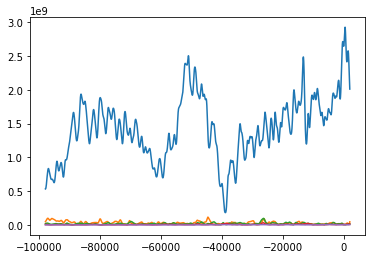

In [9]:
fig = plt.figure()
R_1_plot = plt.plot(GC['year'], R1)
R_2_plot = plt.plot(GC['year'], R2)
R_3_plot = plt.plot(GC['year'], R3)
R_4_plot = plt.plot(GC['year'], R4)
R_5_plot = plt.plot(GC['year'], R5)


In [10]:

np.savetxt('R1_ggf100k.txt', R1)
np.savetxt('R2_ggf100k.txt', R2)
np.savetxt('R3_ggf100k.txt', R3)
np.savetxt('R4_ggf100k.txt', R4)
np.savetxt('R_5ggf100k.txt', R5)